---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [2]:
import pandas as pd
import re
import numpy as np
def energy():
    energy =(pd.read_excel('Energy Indicators.xls',index_col=2,skiprows=16,skipfooter=38,na_values='...',keep_default_na=False)
           .drop(['Unnamed: 0','Unnamed: 1'],axis=1)
           .iloc[1:]
           .reset_index()
           .rename(columns={'index':'Country','Renewable Electricity Production':'% Renewable','Energy Supply per capita':'Energy Supply per Capita'})
           .set_index('Country'))
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    for i, row in energy.iterrows():
        if i == "Republic of Korea":
            energy.rename(index={i:"South Korea"},inplace=True)
        if "United States of America" in i:
            energy.rename(index={i:"United States"},inplace=True)
        if "United Kingdom of Great Britain and Northern Ireland" in i:
            energy.rename(index={i:"United Kingdom"},inplace=True)
        if "China, Hong Kong Special Administrative Region" in i:
            energy.rename(index={i:"Hong Kong"},inplace=True)
        if "(" in i:
            energy.rename(index={i:i.split("(")[0][:-1]},inplace=True)      # Iran (XXXX) There's space between country name and parenthesis
        if re.match(r'(^[A-Za-z\s,]+)([0-9]+$)',i):
            energy.rename(index={i:re.match(r'(^[A-Za-z\s,]+)([0-9]+$)',i).group(1)},inplace=True)
    return energy.convert_objects(convert_numeric=True)

def GDP():
    GDP = (pd.read_csv('world_bank.csv',skiprows=4)
            .rename(columns={'Country Name':'Country'})
            .set_index('Country'))
    for i, row1 in GDP.iterrows():
        if i == 'Korea, Rep.':
            GDP.rename(index={i:"South Korea"},inplace=True)
        if i == "Iran, Islamic Rep.":
            GDP.rename(index={i:"Iran"},inplace=True)
        if i == "Hong Kong SAR, China":
            GDP.rename(index={i:"Hong Kong"},inplace=True)
    return GDP

def ScimEn():
    ScimEn = (pd.read_excel('scimagojr-3.xlsx').iloc[0:15]
               .set_index('Country'))
    return ScimEn

def answer_one():
    new_gdp=GDP()[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    temp = pd.merge(ScimEn(),energy(),how='inner',left_index=True,right_index=True)
    final=pd.merge(temp,new_gdp,how='inner',left_index=True,right_index=True)
    return final

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Energy Supply               float64
Energy Supply per Capita    float64
% Renewable                 float64
dtype: object

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [3]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [2]:
def answer_two():
    ScimEn = (pd.read_excel('scimagojr-3.xlsx')
               .set_index('Country'))
    temp=pd.merge(energy(),GDP(),how='outer',left_index=True,right_index=True)
    temp1=pd.merge(energy(),GDP(),how='inner',left_index=True,right_index=True)
    union=pd.merge(temp,ScimEn,how='outer',left_index=True,right_index=True)
    intersect=pd.merge(temp1,ScimEn,how='inner',left_index=True,right_index=True)
    return len(union)-len(intersect)

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [24]:
def answer_three():
    Top15 = answer_one()
    def avg(row):
        data=row[['2006', '2007', 
                  '2008', '2009', 
                  '2010', '2011',
                  '2012', '2013', 
                  '2014', '2015']]
        return pd.Series({'avgGDP':np.mean(data)})
    return Top15.apply(avg,axis=1).sort('avgGDP',ascending=False).T.iloc[0]

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


'United Kingdom'

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [25]:
def answer_four():
    Top15 = answer_one()
    country=answer_three().index[5]
    df = Top15.loc[country]
    return df.loc['2015']-df.loc['2006']


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [59]:
def answer_five():
    Top15 = answer_one()
    return float(np.mean(Top15['Energy Supply per Capita']))

float

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [45]:
def answer_six():
    Top15 = answer_one()
    value=np.max(Top15['% Renewable'])
    name = (Top15.where(Top15['% Renewable']==value)
                 .dropna()
                 .index[0])
    return (name,value)
answer_one()

Rank  Documents  Citable documents  Citations  \
Country                                                             
Australia             14       8831               8725      90765   
Brazil                15       8668               8596      60702   
Canada                 6      17899              17620     215003   
China                  1     127050             126767     597237   
Germany                7      17027              16831     140566   
Spain                 12       9428               9330     123336   
France                 9      13153              12973     130632   
United Kingdom         4      20944              20357     206091   
India                  8      15005              14841     128763   
Iran                  13       8896               8819      57470   
Italy                 11      10964              10794     111850   
Japan                  3      30504              30287     223024   
South Korea           10      11983              11923     114675   
Russian Federation     5      18534              18301      34266   
United States          2      96661              94747     792274   

                    Self-citations  Citations per document  H index  \
Country                                                               
Australia                    15606                   10.28      107   
Brazil                       14396                    7.00       86   
Canada                       40930                   12.01      149   
China                       411683                    4.70      138   
Germany                      27426                    8.26      126   
Spain                        23964                   13.08      115   
France                       28601                    9.93      114   
United Kingdom               37874                    9.84      139   
India                        37209                    8.58      115   
Iran                         19125                    6.46       72   
Italy                        26661                   10.20      106   
Japan                        61554                    7.31      134   
South Korea                  22595                    9.57      104   
Russian Federation           12422                    1.85       57   
United States               265436                    8.20      230   

                   Energy Supply Energy Supply per Capita % Renewable  \
Country                                                                 
Australia             5386000000                      231     11.8108   
Brazil               12149000000                       59      69.648   
Canada               10431000000                      296     61.9454   
China               127191000000                       93     19.7549   
Germany              13261000000                      165     17.9015   
Spain                 4923000000                      106     37.9686   
France               10597000000                      166     17.0203   
United Kingdom        7920000000                      124     10.6005   
India                33195000000                       26     14.9691   
Iran                  9172000000                      119     5.70772   
Italy                 6530000000                      109     33.6672   
Japan                18984000000                      149     10.2328   
South Korea          11007000000                      221     2.27935   
Russian Federation   30709000000                      214     17.2887   
United States        90838000000                      286      11.571   

                            2006          2007          2008          2009  \
Country                                                                      
Australia           1.021939e+12  1.060340e+12  1.099644e+12  1.119654e+12   
Brazil              1.845080e+12  1.957118e+12  2.056809e+12  2.054215e+12   
Canada              1.564469e+12  1.596740e+12  1.612713e+12  1.565145e+12   
China 

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [60]:
def answer_seven():
    Top15 = answer_one()
    temp=Top15.apply(lambda x: x['Self-citations']/x['Citations'],axis=1)
    max_value = np.max(temp)
    max_index=temp.where(temp==max_value).dropna().index[0]
    return (max_index,max_value)

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [81]:
def answer_eight():
    Top15 = answer_one()
    temp=(Top15.apply(lambda x: x['Energy Supply']/x['Energy Supply per Capita'],axis=1)
               .sort_values(ascending=False))
    return temp.index[2]

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [8]:
def answer_nine():
    Top15 = answer_one()
    Top15['Population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['Citable Documents per Capita']=Top15['Citable documents']/Top15['Population']
    temp= Top15[['Energy Supply per Capita','Citable Documents per Capita']]
    return temp.corr().iloc[0][1]

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


0.79400104354429435

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


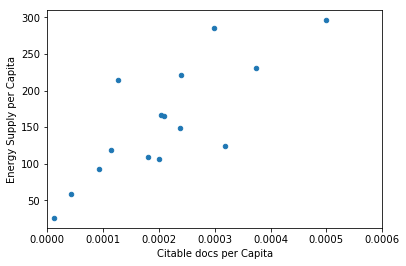

In [11]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [10]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [34]:
def answer_ten():
    Top15 = answer_one()
    median = np.median(Top15['% Renewable'])
    def fun(row):
        data = row['% Renewable']
        if data >= median:
            return pd.Series({"HighRenew":1})
        else:
            return pd.Series({"HighRenew":0})
    return Top15.apply(fun, axis=1).T.iloc[0].sort_values()
answer_ten()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Country
Australia             0
United Kingdom        0
India                 0
Iran                  0
Japan                 0
South Korea           0
United States         0
Brazil                1
Canada                1
China                 1
Germany               1
Spain                 1
France                1
Italy                 1
Russian Federation    1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [94]:
ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
def answer_eleven():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    output = Top15.groupby(ContinentDict)['PopEst'].agg({'size':np.size,'sum':np.sum,'mean':np.average,'std':np.std})
    return output

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Asia             5
Australia        1
Europe           6
North America    2
South America    1
dtype: int64

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [87]:
def answer_twelve():
    Top15 = answer_one()
    temp=pd.cut(Top15['% Renewable'],5)
    return Top15.groupby([ContinentDict,temp]).size()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


               % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [91]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    return Top15['PopEst'].map('{:,}'.format)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Country
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Canada                  35,239,864.86486486
China                 1,367,645,161.2903225
Germany                 80,369,696.96969697
Spain                    46,443,396.2264151
France                  63,837,349.39759036
United Kingdom         63,870,967.741935484
India                 1,276,730,769.2307692
Iran                    77,075,630.25210084
Italy                  59,908,256.880733944
Japan                  127,409,395.97315437
South Korea            49,805,429.864253394
Russian Federation            143,500,000.0
United States          317,615,384.61538464
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


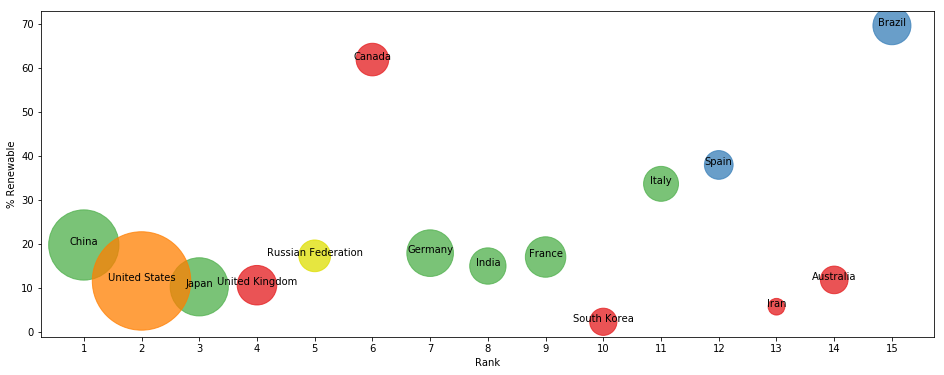

In [95]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
plot_optional()

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!